## **1.급락기의 전략**

###   **1.1 급락기에 고평가된 주식을 팔아야 하나?(02/19-03/19)**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**엑셀 파일 불러오기**

In [24]:
df_0219 = pd.read_excel('C:/Users/pc/Desktop/PHW1129_DY.xlsx',
                    sheet_name = '0219_RET_PER',
                    header = 1,
                    index_col = 'NAME')

In [25]:
df_0219

,RETURN,PER
NAME,,
삼성전자,-0.2865,15.90842
SK하이닉스,-0.3333,29.86342
LG화학,-0.4307,85.23787
삼성바이오로직스,-0.2752,151.14262
NAVER,-0.2401,43.43138
...,...,...
지엘팜텍,-0.5451,NaN
신원종합개발,-0.4342,2.51176
지란지교시큐리티,-0.4080,14.68517


**PER이 100이상인 아웃라이어들 제외**

In [26]:
adj=df_0219['PER']<100

In [27]:
df_0219 = df_0219[adj]

**회귀분석 실시(독립변수: 급락기간의 PER / 종속변수: 급락기간 기업의 수익률)**

In [28]:
reg = sm.OLS.from_formula("RETURN ~ PER", df_0219).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.535
Date:                Sat, 28 Nov 2020   Prob (F-statistic):             0.0188
Time:                        23:26:12   Log-Likelihood:                 623.82
No. Observations:                1232   AIC:                            -1244.
Df Residuals:                    1230   BIC:                            -1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3952      0.006    -65.062      0.000      -0.407      -0.383
PER           -0.0005      0.000     -2.353      0.019      -0.001   -8.97e-05
==============================================================================
Omnibus:                      675.613   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10842.269
Skew:                           2.174   Prob(JB):                         0.00
Kurtosis:                      16.867   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with. seaborn)**

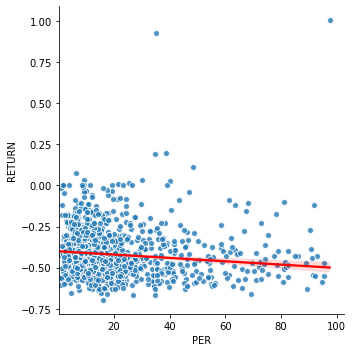

In [29]:
sns.lmplot(x="PER", y="RETURN", data=df_0219,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### 20개로 그룹화하여 다시 상관관계 분석

**수익률 상위로 정렬 , 당시 상장하지 않은 기업들과 PER이 지나치게 높은 아웃라이어들 제외** 

In [30]:
df_0219 = df_0219.sort_values(by = ['RETURN'],axis=0,ascending = False)
df_0219

,RETURN,PER
NAME,,
랩지노믹스,1.0046,97.51720
씨젠,0.9255,35.56916
일양약품,0.1964,37.80371
RFHIC,0.1885,35.53809
YBM넷,0.1146,48.99737
...,...,...
유비쿼스홀딩스,-0.6626,69.23803
보라티알,-0.6629,17.94025
유에스티,-0.6646,35.51281


**스무개의 그룹으로 나눈다. 1232개의 종목들이므로 62개씩 19개의 포트폴리오 (마지막포트폴리오는 54개의 종목으로 구성된다)**

In [31]:
df_0219_1 = df_0219.iloc[:61,:]
df_0219_2 = df_0219.iloc[62:123,:]
df_0219_3 = df_0219.iloc[124:185,:]
df_0219_4 = df_0219.iloc[186:247,:]
df_0219_5 = df_0219.iloc[248:309,:]
df_0219_6= df_0219.iloc[310:371,:]
df_0219_7= df_0219.iloc[372:433,:]
df_0219_8= df_0219.iloc[434:495,:]
df_0219_9= df_0219.iloc[496:557,:]
df_0219_10= df_0219.iloc[558:619,:]
df_0219_11= df_0219.iloc[620:681,:]
df_0219_12= df_0219.iloc[682:743,:]
df_0219_13= df_0219.iloc[744:805,:]
df_0219_14= df_0219.iloc[806:867,:]
df_0219_15= df_0219.iloc[868:929,:]
df_0219_16= df_0219.iloc[930:991,:]
df_0219_17= df_0219.iloc[992:1053,:]
df_0219_18= df_0219.iloc[1054:1115,:]
df_0219_19= df_0219.iloc[1116:1177,:]
df_0219_20= df_0219.iloc[1188:1231,:]


**나눈 20개의 그룹들의 평균수익률과 평균 PER을 구한다**

In [32]:

df_group = (df_0219_1,df_0219_2,df_0219_3,df_0219_4,df_0219_5,df_0219_6,df_0219_7,df_0219_8,df_0219_9,df_0219_10,df_0219_11,df_0219_12,df_0219_13,df_0219_14,df_0219_15,df_0219_16,df_0219_17,df_0219_18,df_0219_19,df_0219_20)
group_20=[]
for df in df_group:
    mean_df_0219 = df.mean()
    data = [[mean_df_0219['RETURN'],mean_df_0219['PER']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','PER'])
    group_20.append(df_group_done)

**나눈 그룹들을 다시 합쳐준다.**

In [33]:
df_0219_1 = group_20[0]
df_0219_2 = group_20[1]
df_0219_3 = group_20[2]
df_0219_4 = group_20[3] 
df_0219_5 = group_20[4]
df_0219_6= group_20[5]
df_0219_7= group_20[6]
df_0219_8= group_20[7]
df_0219_9= group_20[8]
df_0219_10= group_20[9]
df_0219_11= group_20[10]
df_0219_12= group_20[11]
df_0219_13= group_20[12]
df_0219_14= group_20[13]
df_0219_15= group_20[14]
df_0219_16= group_20[15]
df_0219_17= group_20[16]
df_0219_18= group_20[17]
df_0219_19= group_20[18]
df_0219_20= group_20[19]

df_0219_20_GROUP = pd.concat([df_0219_1,df_0219_2,df_0219_3,df_0219_4,df_0219_5,df_0219_6,df_0219_7,df_0219_8,df_0219_9,df_0219_10,df_0219_11,df_0219_12,df_0219_13,df_0219_14,df_0219_15,df_0219_16,df_0219_17,df_0219_18,df_0219_19,df_0219_20],axis = 0)

**나눈 그룹들을 이제 하나의 DataFrame으로 통합시켜 회귀분석을 할 준비를 한다**

In [34]:
df_0219_20_GROUP

,RETURN,PER
0,-0.014103,23.390449
0,-0.189257,12.352338
0,-0.248343,16.469745
0,-0.295215,16.047753
0,-0.325820,16.163406
0,-0.348854,14.215807
0,-0.371289,17.730644
0,-0.387915,15.561839
0,-0.405166,17.099489
0,-0.421648,20.530261


**나눈 20개의 그룹 회귀분석(독립변수:포트폴리오 평균 PER / 종속변수 : 포트폴리오 평균수익률)**

In [35]:
reg = sm.OLS.from_formula("RETURN ~ PER", df_0219_20_GROUP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     6.027
Date:                Sat, 28 Nov 2020   Prob (F-statistic):             0.0245
Time:                        23:26:35   Log-Likelihood:                 13.768
No. Observations:                  20   AIC:                            -23.54
Df Residuals:                      18   BIC:                            -21.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0849      0.134     -0.632      0.535      -0.367       0.197
PER           -0.0166      0.007     -2.455      0.024      -0.031      -0.002
==============================================================================
Omnibus:                       32.225   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.246
Skew:                           2.642   Prob(JB):                     1.52e-15
Kurtosis:                      10.346   Cond. No.                         93.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기 (WITH. seaborn)**

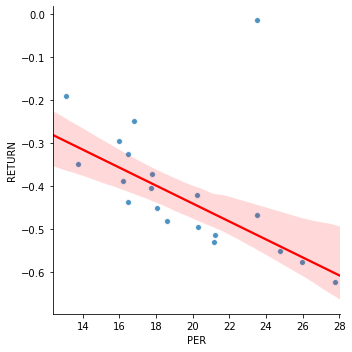

In [36]:
sns.lmplot(x="PER", y="RETURN", data=df_0219_20_GROUP,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### **1.2 급락기에 외국인이 많이 산 종목을 팔아야 하는가?**

**엑셀파일 불러오기**

In [51]:
df_fn_0219 = pd.read_excel('C:/Users/pc/Desktop/PHW1129_DY.xlsx',
                    sheet_name = '0219_RET_ABR',
                    header = 1,
                    index_col = 'NAME')

In [52]:
df_fn_0219

,RETURN,NET_SELL
NAME,,
삼성전자,-0.2865,1320.452220
SK하이닉스,-0.3333,535.791663
LG화학,-0.4307,187.783506
삼성바이오로직스,-0.2752,57.927678
NAVER,-0.2401,128.413675
...,...,...
지엘팜텍,-0.5451,0.227701
신원종합개발,-0.4342,0.035697
지란지교시큐리티,-0.4080,0.065622


**한달동안 순매도대금이 400000000(40억원)이상인 몇안되는 아웃라이더 들은 제외하기로 하였다.**

In [56]:
adj=df_fn_0219['NET_SELL']<400

In [57]:
df_fn_0219 = df_fn_0219[adj]

**회귀분석 (독립변수: 급락기간 외인 매도액 / 종속변수: 급락기간 수익률)**

In [58]:
reg = sm.OLS.from_formula("RETURN ~ NET_SELL", df_fn_0219).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.108
Date:                Sat, 28 Nov 2020   Prob (F-statistic):            0.00774
Time:                        23:33:59   Log-Likelihood:                 535.85
No. Observations:                1998   AIC:                            -1068.
Df Residuals:                    1996   BIC:                            -1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3929      0.004    -91.668      0.000      -0.401      -0.385
NET_SELL       0.0010      0.000      2.666      0.008       0.000       0.002
==============================================================================
Omnibus:                     1031.194   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11196.352
Skew:                           2.183   Prob(JB):                         0.00
Kurtosis:                      13.744   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with.seaborn)**

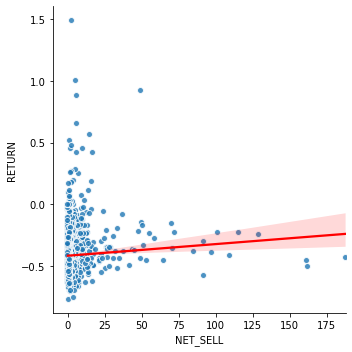

In [59]:
sns.lmplot(x="NET_SELL", y="RETURN", data=df_fn_0219,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### **20개로 그룹화하여 다시 상관관계분석**

**수익률로 정렬**

In [60]:
df_fn_0219 = df_fn_0219.sort_values(by = ['RETURN'],axis=0,ascending = False)
df_fn_0219

,RETURN,NET_SELL
NAME,,
수젠텍,1.4925,1.320490
랩지노믹스,1.0046,5.558530
씨젠,0.9255,48.906664
진원생명과학,0.8835,5.014958
엑세스바이오,0.6623,4.832893
...,...,...
엠투엔,-0.6958,1.210341
유양디앤유,-0.6965,3.856809
아나패스,-0.7054,1.948973


**20개의 그룹으로 나누기 1998개별종목이므로 100개종목씩 포트폴리오를 구성하고 마지막 포트폴리오는 98개의 종목으로 한다.**

In [61]:
df_fn_0219_1 = df_fn_0219.iloc[:99,:]
df_fn_0219_2 = df_fn_0219.iloc[100:199,:]
df_fn_0219_3 = df_fn_0219.iloc[200:299,:]
df_fn_0219_4 = df_fn_0219.iloc[300:399,:]
df_fn_0219_5 = df_fn_0219.iloc[400:499,:]
df_fn_0219_6= df_fn_0219.iloc[500:599,:]
df_fn_0219_7= df_fn_0219.iloc[600:699,:]
df_fn_0219_8= df_fn_0219.iloc[700:799,:]
df_fn_0219_9= df_fn_0219.iloc[800:899,:]
df_fn_0219_10= df_fn_0219.iloc[900:999,:]
df_fn_0219_11= df_fn_0219.iloc[1000:1099,:]
df_fn_0219_12= df_fn_0219.iloc[1100:1199,:]
df_fn_0219_13= df_fn_0219.iloc[1200:1299,:]
df_fn_0219_14= df_fn_0219.iloc[1300:1399,:]
df_fn_0219_15= df_fn_0219.iloc[1400:1499,:]
df_fn_0219_16= df_fn_0219.iloc[1500:1599,:]
df_fn_0219_17= df_fn_0219.iloc[1600:1699,:]
df_fn_0219_18= df_fn_0219.iloc[1700:1799,:]
df_fn_0219_19= df_fn_0219.iloc[1800:1899,:]
df_fn_0219_20= df_fn_0219.iloc[1900:1997,:]

**나눈 20개의 포트폴리오의 평균 수익률과 평균 외인매도액을 계산**

In [63]:
df_group = (df_fn_0219_1,df_fn_0219_2,df_fn_0219_3,df_fn_0219_4,df_fn_0219_5,df_fn_0219_6,df_fn_0219_7,df_fn_0219_8,df_fn_0219_9,df_fn_0219_10,df_fn_0219_11,df_fn_0219_12,df_fn_0219_13,df_fn_0219_14,df_fn_0219_15,df_fn_0219_16,df_fn_0219_17,df_fn_0219_18,df_fn_0219_19,df_fn_0219_20)
group_fn_20=[]
for df in df_group:
    mean_df_fn_0219 = df.mean()
    data = [[mean_df_fn_0219['RETURN'],mean_df_fn_0219['NET_SELL']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','NET_SELL'])
    group_fn_20.append(df_group_done)

**나눈 그룹들을 다시 합쳐준다**

In [65]:
df_fn_0219_1 = group_fn_20[0]
df_fn_0219_2 = group_fn_20[1]
df_fn_0219_3 = group_fn_20[2]
df_fn_0219_4 = group_fn_20[3] 
df_fn_0219_5 = group_fn_20[4]
df_fn_0219_6= group_fn_20[5]
df_fn_0219_7= group_fn_20[6]
df_fn_0219_8= group_fn_20[7]
df_fn_0219_9= group_fn_20[8]
df_fn_0219_10= group_fn_20[9]
df_fn_0219_11= group_fn_20[10]
df_fn_0219_12= group_fn_20[11]
df_fn_0219_13= group_fn_20[12]
df_fn_0219_14= group_fn_20[13]
df_fn_0219_15= group_fn_20[14]
df_fn_0219_16= group_fn_20[15]
df_fn_0219_17= group_fn_20[16]
df_fn_0219_18= group_fn_20[17]
df_fn_0219_19= group_fn_20[18]
df_fn_0219_20= group_fn_20[19]

df_fn_0219_20_GROUP = pd.concat([df_fn_0219_1,df_fn_0219_2,df_fn_0219_3,df_fn_0219_4,df_fn_0219_5,df_fn_0219_6,df_fn_0219_7,df_fn_0219_8,df_fn_0219_9,df_fn_0219_10,df_fn_0219_11,df_fn_0219_12,df_fn_0219_13,df_fn_0219_14,df_fn_0219_15,df_fn_0219_16,df_fn_0219_17,df_fn_0219_18,df_fn_0219_19,df_fn_0219_20],axis = 0)

**나눈 그룹들을 이제 하나의 DataFrame으로 통합시켜 회귀분석을 할 준비를 한다**

In [66]:
df_fn_0219_20_GROUP

,RETURN,NET_SELL
0,0.109197,2.075614
0,-0.065135,3.546387
0,-0.193093,4.200664
0,-0.253523,5.505505
0,-0.302626,3.399939
0,-0.334449,2.574349
0,-0.361968,4.532613
0,-0.384899,3.836602
0,-0.404644,2.452658
0,-0.423178,3.858084


**회귀분석 시행 (독립변수: 포트폴리오 외인 순매도 / 종속변수: 포트폴리오 평균 수익률)** 

In [67]:
reg = sm.OLS.from_formula("RETURN ~ NET_SELL", df_fn_0219_20_GROUP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.190
Date:                Sat, 28 Nov 2020   Prob (F-statistic):             0.0910
Time:                        23:53:28   Log-Likelihood:                 7.9710
No. Observations:                  20   AIC:                            -11.94
Df Residuals:                      18   BIC:                            -9.951
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5486      0.097     -5.671      0.000      -0.752      -0.345
NET_SELL       0.0548      0.031      1.786      0.091      -0.010       0.119
==============================================================================
Omnibus:                       21.420   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.599
Skew:                           2.003   Prob(JB):                     1.68e-06
Kurtosis:                       6.983   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with.seaborn)**

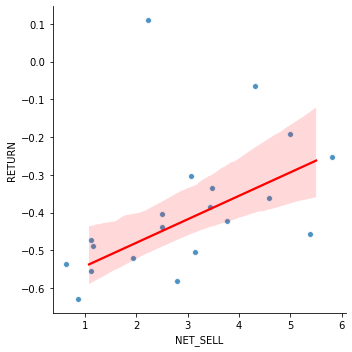

In [68]:
sns.lmplot(x="NET_SELL", y="RETURN", data=df_fn_0219_20_GROUP,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

###   **2.1 회복기에 저평가된 주식을 사야하나?(03/19-06/19)**

**엑셀파일 불러오기**

In [37]:
df_0319 = pd.read_excel('C:/Users/pc/Desktop/PHW1129_DY.xlsx',
                    sheet_name = '0319_RET_PER',
                    header = 1,
                    index_col = 'NAME')

In [38]:
df_0319

,RETURN,PER
NAME,,
삼성전자,0.2317,14.01526
SK하이닉스,0.2377,28.30060
LG화학,1.2261,70.64551
삼성바이오로직스,1.1885,157.17528
NAVER,0.7326,42.43296
...,...,...
지엘팜텍,1.2737,NaN
신원종합개발,0.4700,1.83111
지란지교시큐리티,0.5042,12.22807


**PER 200이상의 아웃라이더들은 제외한다**

In [39]:
adj=df_0319['PER']<200

In [40]:
df_0319 = df_0319[adj]

**회귀분석 실시(독립변수: 회복분기 개별PER /종속변수: 회복기간의 개별수익률)**

In [41]:
reg = sm.OLS.from_formula("RETURN ~ PER", df_0319).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     15.62
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           8.16e-05
Time:                        23:27:01   Log-Likelihood:                -1052.1
No. Observations:                1292   AIC:                             2108.
Df Residuals:                    1290   BIC:                             2118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7145      0.019     37.471      0.000       0.677       0.752
PER            0.0021      0.001      3.952      0.000       0.001       0.003
==============================================================================
Omnibus:                      834.274   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15112.818
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      18.863   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석그래프(with.seaborn)**

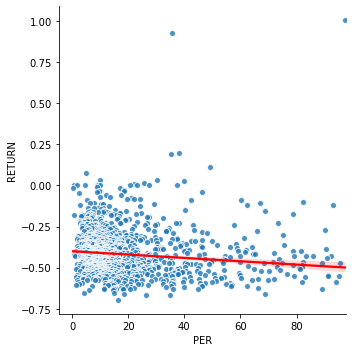

In [42]:
sns.lmplot(x="PER", y="RETURN", data=df_0219,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### 20개로 그룹화하여 다시 상관관계분석

**수익률 상위로 정렬 , 당시 상장하지 않은 기업들과 PER이 200이상인 아웃라이어들 제외** 

In [43]:
df_0319 = df_0319.sort_values(by = ['RETURN'],axis=0,ascending = False)
df_0319

,RETURN,PER
NAME,,
에프에스티,5.8077,6.28661
빅텍,5.7930,28.61623
스페코,4.5407,3.75214
두산퓨얼셀,4.4904,24.31299
대웅,3.7840,7.74620
...,...,...
신세계인터내셔날,-0.1285,18.09660
우신시스템,-0.1295,10.50360
대유에이피,-0.1362,10.46313


**스무개의 그룹으로 나눈다 1292개의 개별종목이므로 65개씩 포트폴리오 구성 마지막은 64개의 종목**

In [44]:
df_0319_1 = df_0319.iloc[:64,:]
df_0319_2 = df_0319.iloc[65:129,:]
df_0319_3 = df_0319.iloc[130:194,:]
df_0319_4 = df_0319.iloc[195:259,:]
df_0319_5 = df_0319.iloc[260:324,:]
df_0319_6= df_0319.iloc[325:389,:]
df_0319_7= df_0319.iloc[390:454,:]
df_0319_8= df_0319.iloc[455:519,:]
df_0319_9= df_0319.iloc[520:584,:]
df_0319_10= df_0319.iloc[585:649,:]
df_0319_11= df_0319.iloc[650:714,:]
df_0319_12= df_0319.iloc[715:779,:]
df_0319_13= df_0319.iloc[780:844,:]
df_0319_14= df_0319.iloc[845:909,:]
df_0319_15= df_0319.iloc[910:974,:]
df_0319_16= df_0319.iloc[975:1039,:]
df_0319_17= df_0319.iloc[1040:1104,:]
df_0319_18= df_0319.iloc[1105:1169,:]
df_0319_19= df_0319.iloc[1170:1234,:]
df_0319_20= df_0319.iloc[1235:1299,:]

**나눈 20개의 포트폴리오의 평균 수익률과  포트폴리오별 평균 PER을 계산한다.**

In [45]:
df_group = (df_0319_1,df_0319_2,df_0319_3,df_0319_4,df_0319_5,df_0319_6,df_0319_7,df_0319_8,df_0319_9,df_0319_10,df_0319_11,df_0319_12,df_0319_13,df_0319_14,df_0319_15,df_0319_16,df_0319_17,df_0319_18,df_0319_19,df_0319_20)
group_20=[]
for df in df_group:
    mean_df_0319 = df.mean()
    data = [[mean_df_0319['RETURN'],mean_df_0319['PER']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','PER'])
    group_20.append(df_group_done)

**나눈 그룹들을 다시 합쳐준다.**

In [46]:
df_0319_1 = group_20[0]
df_0319_2 = group_20[1]
df_0319_3 = group_20[2]
df_0319_4 = group_20[3] 
df_0319_5 = group_20[4]
df_0319_6= group_20[5]
df_0319_7= group_20[6]
df_0319_8= group_20[7]
df_0319_9= group_20[8]
df_0319_10= group_20[9]
df_0319_11= group_20[10]
df_0319_12= group_20[11]
df_0319_13= group_20[12]
df_0319_14= group_20[13]
df_0319_15= group_20[14]
df_0319_16= group_20[15]
df_0319_17= group_20[16]
df_0319_18= group_20[17]
df_0319_19= group_20[18]
df_0319_20= group_20[19]

df_0319_20_GROUP = pd.concat([df_0319_1,df_0319_2,df_0319_3,df_0319_4,df_0319_5,df_0319_6,df_0319_7,df_0319_8,df_0319_9,df_0319_10,df_0319_11,df_0319_12,df_0319_13,df_0319_14,df_0319_15,df_0319_16,df_0319_17,df_0319_18,df_0319_19,df_0319_20],axis = 0)

**나눈 그룹들을 이제 하나의 DataFrame으로 통합시켜 회귀분석을 할 준비를 한다**

In [47]:
df_0319_20_GROUP

,RETURN,PER
0,2.361305,28.635534
0,1.551120,25.769449
0,1.265877,30.898268
0,1.118427,32.059994
0,1.010258,21.467184
0,0.921642,19.706986
0,0.852528,22.226024
0,0.777670,22.024725
0,0.724123,19.429022
0,0.673130,19.378579


**회귀분석 시행 (독립변수: 회복기간 포트폴리오 PER / 종속변수: 회복기간 포트폴리오별 평균 수익률)**

In [48]:
reg = sm.OLS.from_formula("RETURN ~ PER", df_0319_20_GROUP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     19.56
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           0.000329
Time:                        23:27:47   Log-Likelihood:                -7.8882
No. Observations:                  20   AIC:                             19.78
Df Residuals:                      18   BIC:                             21.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9194      0.388     -2.368      0.029      -1.735      -0.104
PER            0.0785      0.018      4.422      0.000       0.041       0.116
==============================================================================
Omnibus:                        6.322   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.817
Skew:                           0.884   Prob(JB):                        0.148
Kurtosis:                       4.206   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with.seabon)**

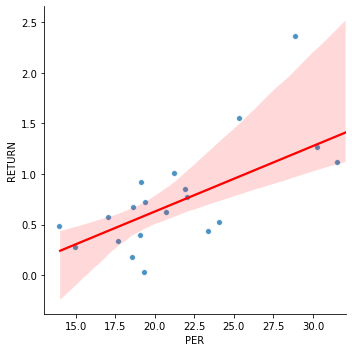

In [49]:
sns.lmplot(x="PER", y="RETURN", data=df_0319_20_GROUP,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### **2.2 회복기에 외국인이 많이 산 종목을 사야 하는가?**

**엑셀파일 불러오기**

In [69]:
df_fn_0319 = pd.read_excel('C:/Users/pc/Desktop/PHW1129_DY.xlsx',
                    sheet_name = '0319_RET_ABR',
                    header = 1,
                    index_col = 'NAME')

In [70]:
df_fn_0319

,RETURN,NET_BUY
NAME,,
삼성전자,0.2317,1786.984216
SK하이닉스,0.2377,603.515302
LG화학,1.2261,317.494913
삼성바이오로직스,1.1885,221.842309
NAVER,0.7326,411.802798
...,...,...
지엘팜텍,1.2737,0.940878
신원종합개발,0.4700,0.123332
지란지교시큐리티,0.5042,0.495451


**외인 순매수가 350000000(35억원) 이상인 아웃라이더들은 제외**

In [75]:
adj = df_fn_0319['NET_BUY']<350

In [76]:
df_fn_0319 = df_fn_0319[adj]

**회귀분석을 시행 (독립변수: 회복기 기업별 외인순매수 / 종속변수: 회복기 기업별 수익률)**

In [77]:
reg = sm.OLS.from_formula("RETURN ~ NET_BUY", df_fn_0319).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.041
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0813
Time:                        00:03:30   Log-Likelihood:                -1796.9
No. Observations:                1996   AIC:                             3598.
Df Residuals:                    1994   BIC:                             3609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7496      0.014     53.468      0.000       0.722       0.777
NET_BUY        0.0012      0.001      1.744      0.081      -0.000       0.002
==============================================================================
Omnibus:                     1102.372   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13345.109
Skew:                           2.347   Prob(JB):                         0.00
Kurtosis:                      14.765   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with.seaborn)**

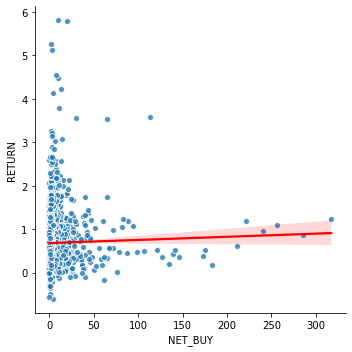

In [78]:
sns.lmplot(x="NET_BUY", y="RETURN", data=df_fn_0319,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

### 20개로 그룹화하여 다시 상관관계 분석하기

**수익률을 기준으로 정렬**

In [95]:
df_fn_0319 = df_fn_0319.sort_values(by = ['RETURN'],axis=0,ascending = False)
df_fn_0319

,RETURN,NET_BUY
NAME,,
에프에스티,5.8077,8.597538
빅텍,5.7930,19.559902
제테마,5.2704,2.034237
비디아이,5.1196,2.780843
스페코,4.5407,7.901801
...,...,...
세화아이엠씨,-0.3070,0.140534
엠벤처투자,-0.3634,0.255083
코드네이처,-0.4884,0.014204


**20개의 그룹으로나눈다 1996개의 개별종목이므로 100개의 개별종목의 포트폴리오가 19개이고 마지막 포트폴리오는 96개**

In [96]:
df_fn_0319_1 = df_fn_0319.iloc[:99,:]
df_fn_0319_2 = df_fn_0319.iloc[100:199,:]
df_fn_0319_3 = df_fn_0319.iloc[200:299,:]
df_fn_0319_4 = df_fn_0319.iloc[300:399,:]
df_fn_0319_5 = df_fn_0319.iloc[400:499,:]
df_fn_0319_6= df_fn_0319.iloc[500:599,:]
df_fn_0319_7= df_fn_0319.iloc[600:699,:]
df_fn_0319_8= df_fn_0319.iloc[700:799,:]
df_fn_0319_9= df_fn_0319.iloc[800:899,:]
df_fn_0319_10= df_fn_0319.iloc[900:999,:]
df_fn_0319_11= df_fn_0319.iloc[1000:1099,:]
df_fn_0319_12= df_fn_0319.iloc[1100:1199,:]
df_fn_0319_13= df_fn_0319.iloc[1200:1299,:]
df_fn_0319_14= df_fn_0319.iloc[1300:1399,:]
df_fn_0319_15= df_fn_0319.iloc[1400:1499,:]
df_fn_0319_16= df_fn_0319.iloc[1500:1599,:]
df_fn_0319_17= df_fn_0319.iloc[1600:1699,:]
df_fn_0319_18= df_fn_0319.iloc[1700:1799,:]
df_fn_0319_19= df_fn_0319.iloc[1800:1899,:]
df_fn_0319_20= df_fn_0319.iloc[1900:1995,:]

**포트폴리오별 평균 수익률과 평균 외인 순매수량을 구한다.**

In [100]:
df_group = (df_fn_0319_1,df_fn_0319_2,df_fn_0319_3,df_fn_0319_4,df_fn_0319_5,df_fn_0319_6,df_fn_0319_7,df_fn_0319_8,df_fn_0319_9,df_fn_0319_10,df_fn_0319_11,df_fn_0319_12,df_fn_0319_13,df_fn_0319_14,df_fn_0319_15,df_fn_0319_16,df_fn_0319_17,df_fn_0319_18,df_fn_0319_19,df_fn_0319_20)
group_fn_20=[]
for df in df_group:
    mean_df_fn_0319 = df.mean()
    data = [[mean_df_fn_0319['RETURN'],mean_df_fn_0319['NET_BUY']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','NET_BUY'])
    group_fn_20.append(df_group_done)

**나눈 그룹들을 다시 합쳐준다**

In [101]:
df_fn_0319_1 = group_fn_20[0]
df_fn_0319_2 = group_fn_20[1]
df_fn_0319_3 = group_fn_20[2]
df_fn_0319_4 = group_fn_20[3] 
df_fn_0319_5 = group_fn_20[4]
df_fn_0319_6= group_fn_20[5]
df_fn_0319_7= group_fn_20[6]
df_fn_0319_8= group_fn_20[7]
df_fn_0319_9= group_fn_20[8]
df_fn_0319_10= group_fn_20[9]
df_fn_0319_11= group_fn_20[10]
df_fn_0319_12= group_fn_20[11]
df_fn_0319_13= group_fn_20[12]
df_fn_0319_14= group_fn_20[13]
df_fn_0319_15= group_fn_20[14]
df_fn_0319_16= group_fn_20[15]
df_fn_0319_17= group_fn_20[16]
df_fn_0319_18= group_fn_20[17]
df_fn_0319_19= group_fn_20[18]
df_fn_0319_20= group_fn_20[19]

df_fn_0319_20_GROUP = pd.concat([df_fn_0319_1,df_fn_0319_2,df_fn_0319_3,df_fn_0319_4,df_fn_0319_5,df_fn_0319_6,df_fn_0319_7,df_fn_0319_8,df_fn_0319_9,df_fn_0319_10,df_fn_0319_11,df_fn_0319_12,df_fn_0319_13,df_fn_0319_14,df_fn_0319_15,df_fn_0319_16,df_fn_0319_17,df_fn_0319_18,df_fn_0319_19,df_fn_0319_20],axis = 0)

**나눈 그룹들을 이제 하나의 DataFrame으로 통합시켜 회귀분석을 할 준비를 한다**

In [102]:
df_fn_0319_20_GROUP

,RETURN,NET_BUY
0,2.489312,7.356777
0,1.605039,5.509656
0,1.309073,9.144939
0,1.148066,12.182618
0,1.031135,7.358046
0,0.934536,6.528059
0,0.863380,7.163410
0,0.793494,4.296930
0,0.734421,3.571965
0,0.682052,3.323148


**회귀분석 시행(독립변수 : 포트폴리오별 평균 외인순매수 / 종속변수 : 포트폴리오별 평균 수익률)**

In [103]:
reg = sm.OLS.from_formula("RETURN ~ NET_BUY", df_fn_0319_20_GROUP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.401
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.252
Time:                        00:18:49   Log-Likelihood:                -16.172
No. Observations:                  20   AIC:                             36.34
Df Residuals:                      18   BIC:                             38.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3290      0.383      0.859      0.402      -0.476       1.134
NET_BUY        0.0658      0.056      1.184      0.252      -0.051       0.183
==============================================================================
Omnibus:                       12.828   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.961
Skew:                           1.400   Prob(JB):                      0.00417
Kurtosis:                       5.304   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 그래프 그리기(with.seaborn)**

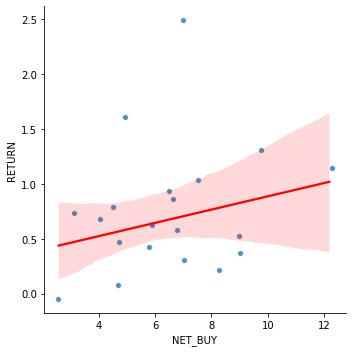

In [104]:
sns.lmplot(x="NET_BUY", y="RETURN", data=df_fn_0319_20_GROUP,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)